# Tutorial - Time Series Forecasting - Simple Exponential Smoothing

The goal is to forecast time series with the Simple Exponential Smoothing Approach. 1) JetRail Commuter, 2) Air Passengers, 3) Function Simple Exponential Smoothing with Air Passengers, and 5) Function Simple Exponential Smoothing with Wine Sales.

References Analytics Vidhya - https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [6]:
# Load File
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Avg%20Hourly%20Traffic%20Data%20-%202012-2013.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
Datetime    494 non-null object
ID          494 non-null float64
Count       494 non-null float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [7]:
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime

# Simple Exponential Smoothing (SES) Approach with JetRail 

This method consists of using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

In [8]:
#Split Train Test
import math
total_size=len(df)
split = 10392 / 11856
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Create prediction table
y_hat = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))

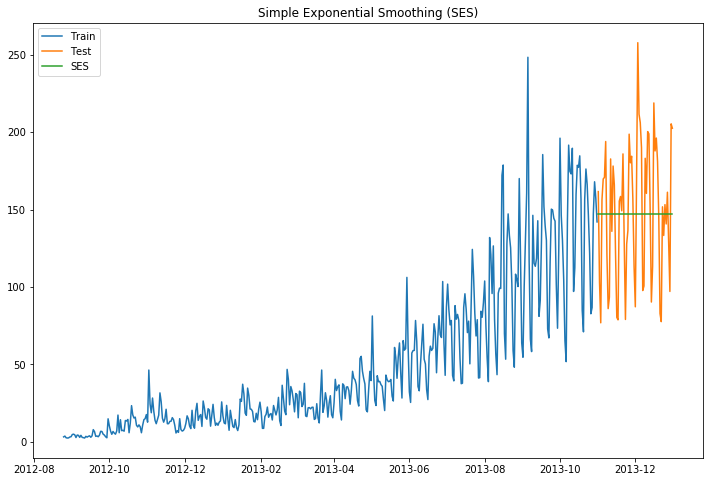

In [11]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['SES'], label='SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing (SES)")
plt.show()

# RMSE Calculation

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.SES))
print('RMSE = '+str(rms))

RMSE = 43.35762522522814


# Simple Exponential Smoothing (SES) Approach with Air Passagers

In [31]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.info()
df.Month = pd.to_datetime(df.Month,format='%Y-%m')
df.index = df.Month
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [32]:
#Creating train and test set 
import math
total_size=len(df)
train_size=math.floor(0.7*total_size) #(70% Dataset)
train=df.head(train_size)
test=df.tail(len(df) -train_size)
#train.info()
#test.info()

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Create prediction table
y_hat = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Passengers'])).fit(smoothing_level=0.6,optimized=False)
y_hat['SES'] = fit2.forecast(len(test))
y_hat.describe()

,Passengers,SES
count,44.000000,4.400000e+01
mean,421.068182,3.429591e+02
std,77.330279,4.025041e-13
min,305.000000,3.429591e+02
25%,359.750000,3.429591e+02
50%,406.500000,3.429591e+02
75%,465.500000,3.429591e+02
max,622.000000,3.429591e+02


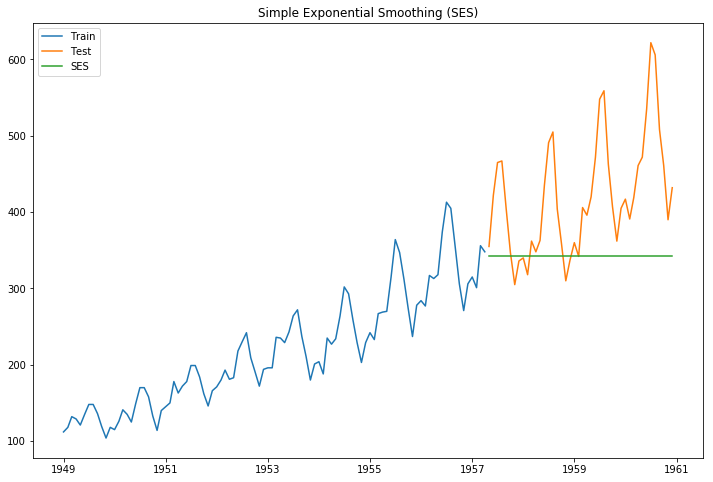

In [34]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['SES'], label='SES')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing (SES)")
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Passengers, y_hat.SES))
print('RMSE = '+str(rms))

RMSE = 109.29360124771299


# Function Simple Exponential Smoothing (SES) Approach

In [36]:
def SES_forecasting(mydf,colval,split):
    #print(split)
    import math
    from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    fit2 = SimpleExpSmoothing(np.asarray(train[colval])).fit(smoothing_level=0.6,optimized=False)
    y_hat['SES'] = fit2.forecast(len(test))
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['SES'], label='SES')
    plt.legend(loc='best')
    plt.title("Simple Exponential Smoothing (SES)")
    plt.show()
    rms = sqrt(mean_squared_error(test[colval], y_hat.SES))
    print('RMSE = '+str(rms))

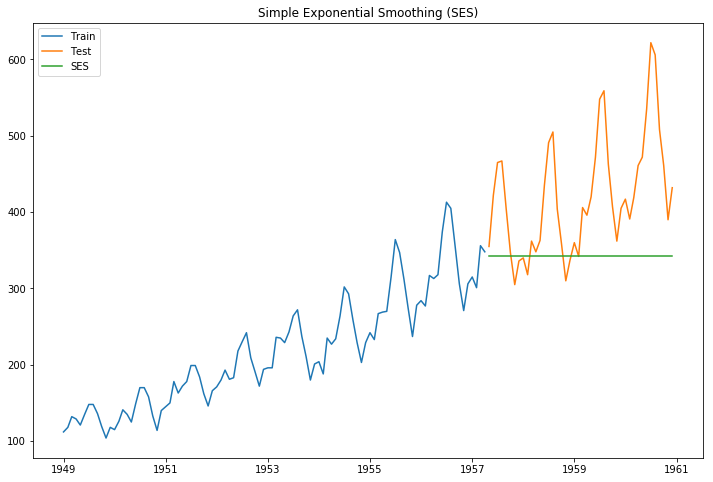

RMSE = 109.29360124771299


In [37]:
SES_forecasting(df,'Passengers',0.7)

# Testing Function Simple Exponential Smoothing (SES) Approach with Wine Dataset

In [38]:
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.info()
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
Date     176 non-null object
Sales    176 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


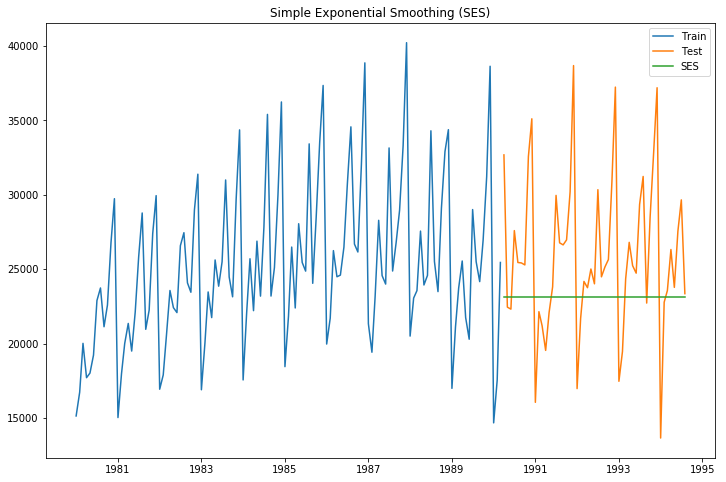

RMSE = 5888.1673179347


In [39]:
SES_forecasting(df,'Sales',0.7)